### Ridge Regression Algorithm

In [14]:
import pandas as pd 
import numpy as np

In [15]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df= pd.read_csv(url)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [16]:
target_col = 'medv'
X = df.drop(columns=target_col)
y = df[target_col]

In [17]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [19]:
## Train and split
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,train_size=0.30,random_state=42)

In [20]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
256,0.01538,90.0,3.75,0,0.394,7.454,34.2,6.3361,3,244,15.9,386.34,3.11
453,8.24809,0.0,18.10,0,0.713,7.393,99.3,2.4527,24,666,20.2,375.87,16.74
100,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42
226,0.38214,0.0,6.20,0,0.504,8.040,86.5,3.2157,8,307,17.4,387.38,3.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [21]:
## Standerdizing dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
## Model selection
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
ridge_regressor = Ridge()
ridge_regressor

Ridge()

In [24]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [25]:
print(ridgecv.best_params_)

{'alpha': 20}


In [26]:
print(ridgecv.best_score_)

-26.135557476067852


In [28]:
ridgecv_pred = ridgecv.predict(X_test)

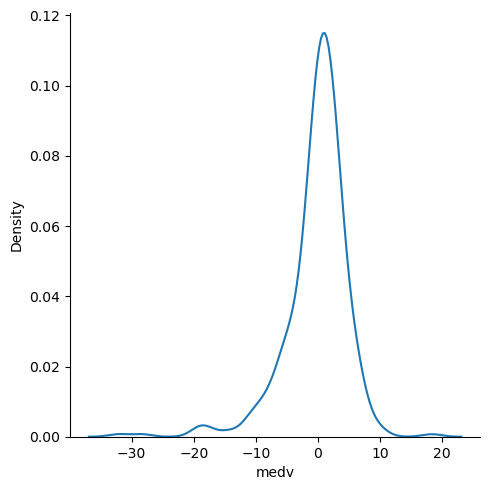

In [29]:
import seaborn as sns
sns.displot(ridgecv_pred - y_test, kind='kde')

In [32]:
from sklearn.metrics import r2_score
score = r2_score(ridgecv_pred,y_test)
score

0.5832049077885794

## Lasso Regression Algorithm

In [33]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso()

In [36]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [39]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 20}
-26.135557476067852


In [40]:
lassocv_pred = lassocv.predict(X_test)

In [41]:
lassocv_pred

array([27.059943  , 35.21257311, 17.66556741, 24.88654897, 18.5084951 ,
       22.79319719, 18.11870192, 15.73326883, 20.65782143, 20.46164375,
       25.0397301 , 20.14711956, -4.14794764, 22.40113423, 18.461665  ,
       25.2207207 , 18.61292929,  5.79171296, 39.34066917, 17.32285149,
       26.28137891, 28.31022773, 12.25439916, 23.8574903 , 16.92088724,
       13.76756707, 22.70328477, 15.28550562, 22.93101368, 19.28466479,
       20.50895642, 24.67614034, 25.14979707, 16.0684544 , 15.53154324,
       19.00645194, 30.97045622, 19.81082436, 24.91748971, 24.93982993,
       14.57027961, 28.86125271, 40.51406927, 18.34107143, 26.26680288,
       15.78513225, 14.06894527, 26.2116969 , 18.97091269, 29.92476474,
       22.07833283, 33.08891367, 16.603997  , 25.65856309, 38.35897192,
       21.92891268, 18.31565268, 30.258136  , 24.77273678, 14.15362236,
       23.65993131, 30.51609473, 30.04546252, 16.04424988, 23.74683889,
       17.37960854, 19.69802157, 25.29411485, 29.05699491, 11.78

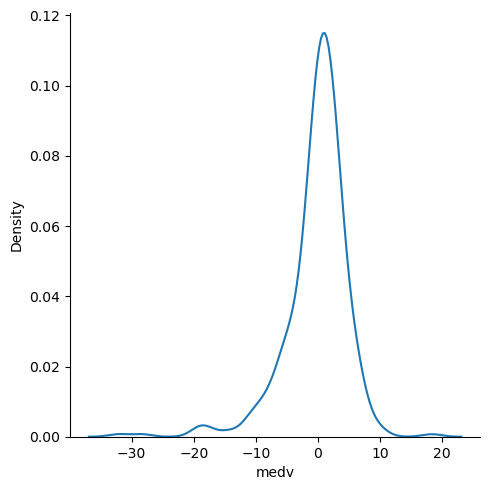

In [43]:
sns.displot(lassocv_pred - y_test,kind='kde')